***
# <font color=darkblue size=6>SCRIPT DE RESULTADOS PRELIMINARES</font>
***

## **Trabalho de Conclusão de Curso do MBA USP ESALQ Data Science & Analytics**

### **Título:** Comparação de algoritmos de reconhecimento facial na identificação de indivíduos negros

### **Discente:** Renata Lima Ribeiro de Sena (renatalrs@usp.br)
### **Orientador:** Igor Pinheiro de Araújo Costa



# <font color=darkblue>DATASET DO PROJETO</font>
***

### Consulta de Candidatos das Eleições Brasileiras - 2022

No arquivo de <b>Candidatos das Eleições Brasileiras de 2022</b> constam arquivos com informações acerca do perfil dos candidatos, declarações de bens, fotos, dados sobre os partidos e as coligações, vagas por cargo e por unidade eleitoral, além dos sites e redes sociais dos candidatos e motivos de cassações ou indeferimento de registros de candidatura.

### Fonte dos Dados

https://dadosabertos.tse.jus.br/dataset/candidatos-2022

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais a partir desse script:
> 1. Foram utilizadas **apenas as variáveis citadas a seguir**;
> 2. Foram considerados somente os registros de candidatos/as cuja COR é **Preta, Branca e Parda** para efeitos de comparação;
> 3. Foram considerados somente os registros de candidatos/as cuja candidatura foi **DEFERIDA**.
> 4. Foram escolhidos aleatoriamente 30 candidatos. Entre esses:
  * **6** por região
  * **3** de cada gênero analisado
  * **1** de cada COR/RAÇA analisada

### Variáveis utilizadas

> ### NOME
> ***

Nome do/a Candidato/a.

> ### UF
> ***

|Código|Descrição|
|---|---|
|RO|Rondônia|
|AC|Acre|
|AM|Amazonas|
|RR|Roraima|
|PA|Pará|
|AP|Amapá|
|TO|Tocantins|
|MA|Maranhão|
|PI|Piauí|
|CE|Ceará|
|RN|Rio Grande do Norte|
|PB|Paraíba|
|PE|Pernambuco|
|AL|Alagoas|
|SE|Sergipe|
|BA|Bahia|
|MG|Minas Gerais|
|ES|Espírito Santo|
|RJ|Rio de Janeiro|
|SP|São Paulo|
|PR|Paraná|
|SC|Santa Catarina|
|RS|Rio Grande do Sul|
|MS|Mato Grosso do Sul|
|MT|Mato Grosso|
|GO|Goiás|
|DF|Distrito Federal|

> ### GENERO	
> ***

|Descrição|
|---|
|Masculino|
|Feminino|

> ### COR
> ***

|Descrição|
|---|
|Branca|
|Preta|
|Parda|

> ### CARGO
> ***

|Descrição|
|---|
|Governador|
|Vice-governador|
|Senador|
|1º Suplente|
|2º Suplente|
|Deputado Federal|
|Deputado Estadual|
|Presidente|
|Vice-presidente|

### Importando as bibliotecas necessárias e clonando o repositório com o dataset

In [210]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

from os import listdir, path, makedirs, remove
from os.path import isfile, join

import shutil

from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_score

In [211]:
! git clone https://github.com/renadeveloper/tcc_mba_usp_resultados_preliminares/

fatal: destination path 'tcc_mba_usp_resultados_preliminares' already exists and is not an empty directory.


### Importando base de dados de Candidatos(as) das Eleições 2022

In [212]:
candidatos_br = pd.read_csv('./tcc_mba_usp_resultados_preliminares/datasets/consulta_cand_2022_BRASIL.csv', encoding='latin-1', on_bad_lines='skip', sep=';')
candidatos_br

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
0,23/01/2023,18:38:59,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6027413720226090000,2,DEFERIDO,17,PENDENTE DE JULGAMENTO,SIM,#NULO#,2,Deferido,N
1,23/01/2023,18:38:59,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6039056320226260000,4,INDEFERIDO COM RECURSO,4,INDEFERIDO COM RECURSO,SIM,Anulado,14,Indeferido,S
2,23/01/2023,18:38:59,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6007343420226140000,-1,#NULO#,-1,#NULO#,NÃO,#NULO#,-1,#NULO#,N
3,23/01/2023,18:38:59,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6009495920226050000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
4,23/01/2023,18:38:59,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6013881620226070000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29309,23/01/2023,18:38:59,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6006205220226120000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
29310,23/01/2023,18:38:59,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6005349220226080000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
29311,23/01/2023,18:38:59,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6009327620226210000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
29312,23/01/2023,18:38:59,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6004811920226150000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


### Refinando base de dados

In [213]:
# Filtrando apenas para das pessoas candidatas deferidas e organizando o index

mask = (candidatos_br['DS_SITUACAO_CANDIDATO_TOT'] != 'Deferido')

candidatos_br = candidatos_br.loc[~mask]
candidatos_br.reset_index(drop=True, inplace = True)

In [214]:
# Conferindo que só existem candidatos deferidos

candidatos_br['DS_SITUACAO_CANDIDATO_TOT'].value_counts()

Deferido    26358
Name: DS_SITUACAO_CANDIDATO_TOT, dtype: int64

In [215]:
# Filtrando apenas informações das pessoas candidatas com Cor / Raça Preta, Parda e Branca e organizando o index

mask = (candidatos_br['DS_COR_RACA'] != 'PRETA') & (candidatos_br['DS_COR_RACA'] != 'PARDA') & (candidatos_br['DS_COR_RACA'] != 'BRANCA')

candidatos_br = candidatos_br.loc[~mask]
candidatos_br.reset_index(drop=True, inplace = True)

In [216]:
# Conferindo se existem apenas candidatos Pretos, Pardos e Brancos

candidatos_br['DS_COR_RACA'].value_counts()

BRANCA    12830
PARDA      9450
PRETA      3692
Name: DS_COR_RACA, dtype: int64

In [217]:
# Filtrando apenas as colunas utilizadas para identificação das pessoas candidatas

candidatos_br = candidatos_br.loc[:,['NM_CANDIDATO','SG_UF','DS_GENERO','DS_COR_RACA', 'DS_CARGO']]

In [218]:
# Conferindo as colunas remanescentes

candidatos_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25972 entries, 0 to 25971
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NM_CANDIDATO  25972 non-null  object
 1   SG_UF         25972 non-null  object
 2   DS_GENERO     25972 non-null  object
 3   DS_COR_RACA   25972 non-null  object
 4   DS_CARGO      25972 non-null  object
dtypes: object(5)
memory usage: 1014.7+ KB


In [219]:
# Adequando o nome das colunas

map = {'NM_CANDIDATO': 'NOME', 'SG_UF': 'UF', 'DS_GENERO': 'GENERO', 'DS_COR_RACA': 'COR', 'DS_CARGO': 'CARGO'}
candidatos_br.rename(columns=map, inplace = True)

### Filtrando pessoas candidatas por região do país

In [220]:
# Criando novo dataset para informações de pessoas candidatas da Região Sul e organizando o index

mask = (candidatos_br['UF'] == 'RS') | (candidatos_br['UF'] == 'PR') | (candidatos_br['UF'] == 'SC')
candidatos_sul = candidatos_br[mask]
candidatos_sul.reset_index(drop=True, inplace = True)

In [221]:
# Conferindo o dataset

candidatos_sul.head()

,NOME,UF,GENERO,COR,CARGO
0,PABLO JAMILK FLORES,PR,MASCULINO,BRANCA,DEPUTADO ESTADUAL
1,JOSUÉ VIEIRA SELIS,PR,MASCULINO,PARDA,DEPUTADO ESTADUAL
2,TIAGO CHANAN SIMON,RS,MASCULINO,BRANCA,DEPUTADO ESTADUAL
3,RAMIRO STALLBAUM ROSÁRIO,RS,MASCULINO,BRANCA,DEPUTADO ESTADUAL
4,SORAIA REGINA DA SILVA,PR,FEMININO,BRANCA,DEPUTADO ESTADUAL


In [222]:
# Criando novo dataset para informações de pessoas candidatas da Região Sudeste e organizando o index

mask = (candidatos_br['UF'] == 'MG') | (candidatos_br['UF'] == 'ES') | (candidatos_br['UF'] == 'SP') | (candidatos_br['UF'] == 'RJ')
candidatos_sudeste = candidatos_br[mask]
candidatos_sudeste.reset_index(drop=True, inplace = True)

In [223]:
# Conferindo o dataset

candidatos_sudeste.head()

,NOME,UF,GENERO,COR,CARGO
0,RICARDO BORGES DE OLIVEIRA,SP,MASCULINO,PRETA,DEPUTADO ESTADUAL
1,JAKELINE DE ANDRADE SILVA,ES,FEMININO,PARDA,DEPUTADO ESTADUAL
2,MARCUS VINÍCIUS SOARES DANTAS,MG,MASCULINO,PARDA,DEPUTADO ESTADUAL
3,LACY TEIXEIRA CAMARGOS,RJ,MASCULINO,BRANCA,DEPUTADO ESTADUAL
4,JORGE DE OLIVEIRA ALMEIDA,RJ,MASCULINO,PARDA,DEPUTADO ESTADUAL


In [224]:
# Criando novo dataset para informações de pessoas candidatas da Região Centro-Oeste e organizando o index

mask = (candidatos_br['UF'] == 'MT') | (candidatos_br['UF'] == 'MS') | (candidatos_br['UF'] == 'GO') | (candidatos_br['UF'] == 'DF')
candidatos_centro_oeste = candidatos_br[mask]
candidatos_centro_oeste.reset_index(drop=True, inplace = True)

In [225]:
# Conferindo o dataset

candidatos_centro_oeste.head()

,NOME,UF,GENERO,COR,CARGO
0,OSMAIR FERREIRA DA SILVA,GO,MASCULINO,PRETA,2º SUPLENTE
1,ROBERT LUIS MARQUES RODRIGUES,DF,MASCULINO,BRANCA,DEPUTADO DISTRITAL
2,ROBERTA DE CAMARGO,DF,FEMININO,BRANCA,DEPUTADO FEDERAL
3,GERACINO ALVES SOBRINHO,GO,MASCULINO,BRANCA,DEPUTADO ESTADUAL
4,RENATA SOUZA REIS,GO,FEMININO,PARDA,DEPUTADO ESTADUAL


In [226]:
# Criando novo dataset para informações de pessoas candidatas da Região Nordeste e organizando o index

mask = (candidatos_br['UF'] == 'AL') | (candidatos_br['UF'] == 'BA') | (candidatos_br['UF'] == 'CE') | (candidatos_br['UF'] == 'MA') | (candidatos_br['UF'] == 'PB') | (candidatos_br['UF'] == 'PE') | (candidatos_br['UF'] == 'PI') | (candidatos_br['UF'] == 'RN') | (candidatos_br['UF'] == 'SE')
candidatos_nordeste = candidatos_br[mask]
candidatos_nordeste.reset_index(drop=True, inplace = True)

In [227]:
# Conferindo o dataset

candidatos_nordeste.head()

,NOME,UF,GENERO,COR,CARGO
0,INGRID GRACILIANO CIRNE GUIMARÃES,BA,FEMININO,PRETA,DEPUTADO FEDERAL
1,EDNA BARRADAS DOS SANTOS,PI,FEMININO,PARDA,DEPUTADO FEDERAL
2,ILMARA NASCIMENTO DE MORAIS,PB,FEMININO,BRANCA,DEPUTADO FEDERAL
3,JOSÉ ANDERSON ABREU ROCHA,MA,MASCULINO,BRANCA,DEPUTADO FEDERAL
4,JAMERSON FERNANDES BEZERRA FRANÇA,AL,MASCULINO,BRANCA,DEPUTADO FEDERAL


In [228]:
# Criando novo dataset para informações de pessoas candidatas da Região Norte e organizando o index

mask = (candidatos_br['UF'] == 'AM') | (candidatos_br['UF'] == 'AC') | (candidatos_br['UF'] == 'PA') | (candidatos_br['UF'] == 'RR') | (candidatos_br['UF'] == 'RO') | (candidatos_br['UF'] == 'AP') | (candidatos_br['UF'] == 'TO')
candidatos_norte = candidatos_br[mask]
candidatos_norte.reset_index(drop=True, inplace = True)

In [229]:
# Conferindo o dataset

candidatos_norte.head()

,NOME,UF,GENERO,COR,CARGO
0,JUCELINO VIEIRA DO NASCIMENTO,AM,MASCULINO,BRANCA,DEPUTADO FEDERAL
1,ANGELA MARIA MORAES DA SILVA,PA,FEMININO,PRETA,DEPUTADO FEDERAL
2,SIDILENE SILVA LIMA,AC,FEMININO,PRETA,DEPUTADO ESTADUAL
3,WANDERLEI NOGUEIRA DE SOUSA,PA,MASCULINO,PARDA,DEPUTADO FEDERAL
4,ANTONIO DOS SANTOS FILHO,RR,MASCULINO,PARDA,DEPUTADO ESTADUAL


### Colhendo amostras aleatórias da **Região Sul**, respeitando quantidades igualitárias de gênero e cor

In [230]:
df1 = candidatos_sul.query("GENERO == 'MASCULINO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [231]:
df2 = candidatos_sul.query("GENERO == 'MASCULINO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [232]:
df3 = candidatos_sul.query("GENERO == 'MASCULINO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [233]:
df4 = candidatos_sul.query("GENERO == 'FEMININO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [234]:
df5 = candidatos_sul.query("GENERO == 'FEMININO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [235]:
df6 = candidatos_sul.query("GENERO == 'FEMININO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [236]:
# Criando uma base de dados preliminar para as amostras aleatórias

base_dados_preliminar = pd.DataFrame(columns=['NOME', 'UF', 'GENERO', 'COR'])
base_dados_preliminar

,NOME,UF,GENERO,COR


In [237]:
# Concatenando as amostras aleatórias na base de dados preliminar

union_dfs = pd.concat([df1, df2, df3, df4, df5, df6])
base_dados_preliminar = base_dados_preliminar.append(union_dfs, ignore_index=True)

### Colhendo amostras aleatórias da **Região Sudeste**, respeitando quantidades igualitárias de gênero e cor

In [238]:
df1 = candidatos_sudeste.query("GENERO == 'MASCULINO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [239]:
df2 = candidatos_sudeste.query("GENERO == 'MASCULINO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [240]:
df3 = candidatos_sudeste.query("GENERO == 'MASCULINO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [241]:
df4 = candidatos_sudeste.query("GENERO == 'FEMININO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [242]:
df5 = candidatos_sudeste.query("GENERO == 'FEMININO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [243]:
df6 = candidatos_sudeste.query("GENERO == 'FEMININO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [244]:
# Concatenando as amostras aleatórias na base de dados preliminar

union_dfs = pd.concat([df1, df2, df3, df4, df5, df6])
base_dados_preliminar = base_dados_preliminar.append(union_dfs, ignore_index=True)

### Colhendo amostras aleatórias da **Região Nordeste**, respeitando quantidades igualitárias de gênero e cor

In [245]:
df1 = candidatos_nordeste.query("GENERO == 'MASCULINO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [246]:
df2 = candidatos_nordeste.query("GENERO == 'MASCULINO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [247]:
df3 = candidatos_nordeste.query("GENERO == 'MASCULINO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [248]:
df4 = candidatos_nordeste.query("GENERO == 'FEMININO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [249]:
df5 = candidatos_nordeste.query("GENERO == 'FEMININO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [250]:
df6 = candidatos_nordeste.query("GENERO == 'FEMININO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [251]:
# Concatenando as amostras aleatórias na base de dados preliminar

union_dfs = pd.concat([df1, df2, df3, df4, df5, df6])
base_dados_preliminar = base_dados_preliminar.append(union_dfs, ignore_index=True)

### Colhendo amostras aleatórias da **Região Norte**, respeitando quantidades igualitárias de gênero e cor

In [252]:
df1 = candidatos_norte.query("GENERO == 'MASCULINO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [253]:
df2 = candidatos_norte.query("GENERO == 'MASCULINO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [254]:
df3 = candidatos_norte.query("GENERO == 'MASCULINO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [255]:
df4 = candidatos_norte.query("GENERO == 'FEMININO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [256]:
df5 = candidatos_norte.query("GENERO == 'FEMININO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [257]:
df6 = candidatos_norte.query("GENERO == 'FEMININO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [258]:
# Concatenando as amostras aleatórias na base de dados preliminar

union_dfs = pd.concat([df1, df2, df3, df4, df5, df6])
base_dados_preliminar = base_dados_preliminar.append(union_dfs, ignore_index=True)

### Colhendo amostras aleatórias da **Região Centro Oeste**, respeitando quantidades igualitárias de gênero e cor

In [259]:
df1 = candidatos_centro_oeste.query("GENERO == 'MASCULINO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [260]:
df2 = candidatos_centro_oeste.query("GENERO == 'MASCULINO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [261]:
df3 = candidatos_centro_oeste.query("GENERO == 'MASCULINO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [262]:
df4 = candidatos_centro_oeste.query("GENERO == 'FEMININO' & COR == 'PRETA'").sample(n=1, random_state=1)

In [263]:
df5 = candidatos_centro_oeste.query("GENERO == 'FEMININO' & COR == 'BRANCA'").sample(n=1, random_state=1)

In [264]:
df6 = candidatos_centro_oeste.query("GENERO == 'FEMININO' & COR == 'PARDA'").sample(n=1, random_state=1)

In [265]:
# Concatenando as amostras aleatórias na base de dados preliminar

union_dfs = pd.concat([df1, df2, df3, df4, df5, df6])
base_dados_preliminar = base_dados_preliminar.append(union_dfs, ignore_index=True)

In [266]:
# Conferindo a base de dados preliminar

base_dados_preliminar

,NOME,UF,GENERO,COR,CARGO
0,AIRTON RIBAS,RS,MASCULINO,PRETA,DEPUTADO FEDERAL
1,RENAN BERLEZE RECCHIA,RS,MASCULINO,BRANCA,DEPUTADO FEDERAL
2,JOÃO MARIA MARQUES ROSA,SC,MASCULINO,PARDA,DEPUTADO ESTADUAL
3,MARIZANE FERNANDES RIBEIRO,SC,FEMININO,PRETA,DEPUTADO FEDERAL
4,GEOVANIA DE SA,SC,FEMININO,BRANCA,DEPUTADO FEDERAL
5,CLENI SILVA DE OLIVEIRA,RS,FEMININO,PARDA,DEPUTADO FEDERAL
6,ROMILSON LIBERATO DA SILVA,MG,MASCULINO,PRETA,DEPUTADO FEDERAL
7,MATHEUS COIMBRA MARTINS DE AGUIAR,SP,MASCULINO,BRANCA,DEPUTADO ESTADUAL
8,FLAVIO CAMPOS FERREIRA,RJ,MASCULINO,PARDA,DEPUTADO FEDERAL
9,SILVIA CRISTINA DE MENDONÇA,RJ,FEMININO,PRETA,DEPUTADO ESTADUAL


# <font color=darkblue>BANCO DE IMAGENS PARA RECONHECIMENTO FACIAL</font>
***

### Baixando imagens da base de dados preliminar

A partir da base de dados preliminar, adiciona-se o campo **PREFIX_NOME_ARQUIVO** que identifica qual o prefixo do nome do arquivo de imagem de cada pessoa candidata.

A partir daí foram extraídas duas imagens de cada pessoa candidata a partir do site de Divulgação de Candidaturas e Contas Eleitorais - 2022 e redes sociais dos candidatos em questão.

As imagens foram salvas em **./tcc_mba_usp_resultados_preliminares/imagens/raw_faces** com o modelo **sxx**_**y**.jpg, onde sxx corresponde ao campo **PREFIX_NOME_ARQUIVO** e **y** corresponde ao número da imagem, se 1 ou 2.

#### <font color='red'>Observação</font>
***
> As imagens das pessoas candidatas utilizadas estão relacionadas às campanhas eleitorais, podendo assim serem utilizadas para este fim.



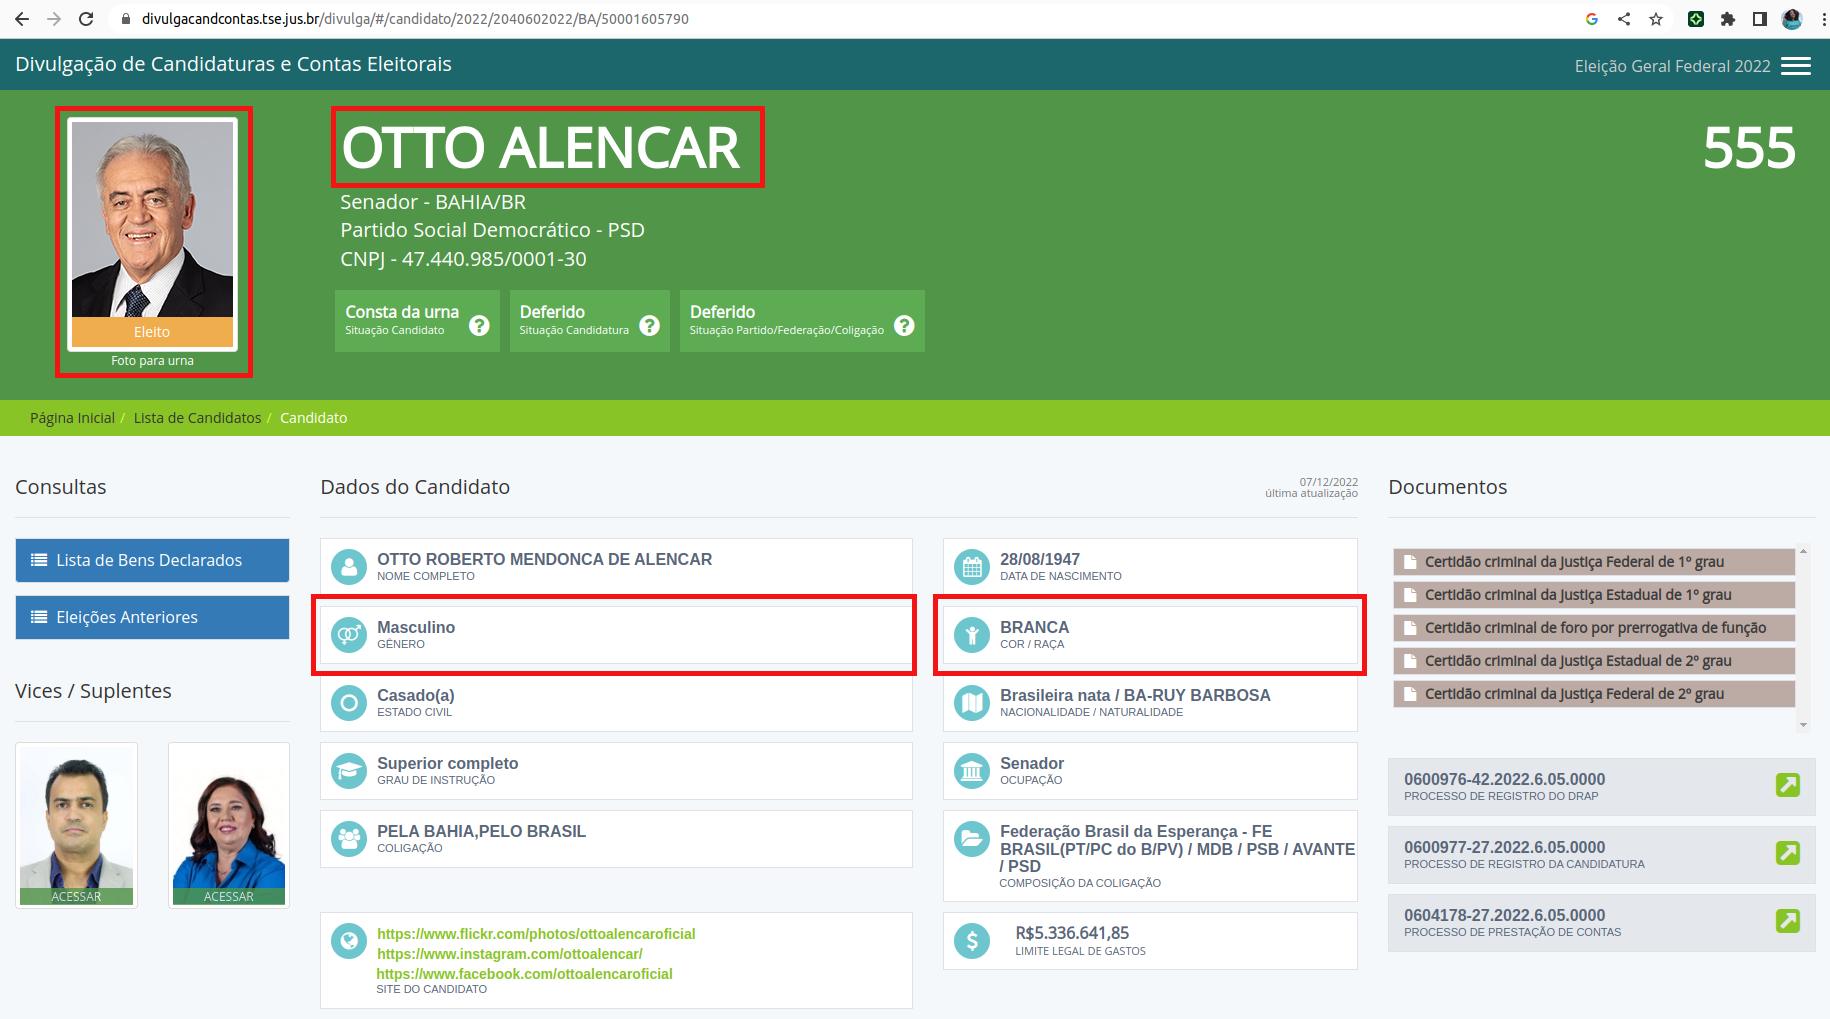

In [267]:
# Checando a base de dados usada para nomear os arquivos de imagens

dados_legenda = pd.read_csv('./tcc_mba_usp_resultados_preliminares/datasets/tabela_prefixos.csv', encoding='latin-1', on_bad_lines='skip', sep=',')
dados_legenda

,PREFIX_NOME_ARQUIVO,NOME,UF,GENERO,COR
0,s0,AIRTON RIBAS,RS,MASCULINO,PRETA
1,s1,RENAN BERLEZE RECCHIA,RS,MASCULINO,BRANCA
2,s2,JOÃO MARIA MARQUES ROSA,SC,MASCULINO,PARDA
3,s3,MARIZANE FERNANDES RIBEIRO,SC,FEMININO,PRETA
4,s4,GEOVANIA DE SA,SC,FEMININO,BRANCA
5,s5,CLENI SILVA DE OLIVEIRA,RS,FEMININO,PARDA
6,s6,ROMILSON LIBERATO DA SILVA,MG,MASCULINO,PRETA
7,s7,MATHEUS COIMBRA MARTINS DE AGUIAR,SP,MASCULINO,BRANCA
8,s8,FLAVIO CAMPOS FERREIRA,RJ,MASCULINO,PARDA
9,s9,SILVIA CRISTINA DE MENDONÃA,RJ,FEMININO,PRETA


# <font color=darkblue>CRIAÇÃO DE MODELOS DE RECONHECIMENTO FACIAL A PARTIR DE ALGORITMOS</font>
***

### Aplicação do Classificador de Faces Haar Cascades

O classificador Haar cascades é utilizado para detectar rostos em imagens ou vídeos. Ele captura as características distintas de um rosto, como a forma dos olhos, nariz, boca e queixo e, em seguida, utiliza uma técnica de aprendizado de máquina para classificar se uma determinada região da imagem corresponde a um rosto ou não.

Para esse projeto o classificador será utilizado para definir a região de interesse das pessoas candidatas para que possam ser aplicados posteriormente os algoritmos de reconhecimento facial.

É necessário utilizar um classificador para definir a **região de interesse**, que neste caso é apenas a face, pois nas imagens das pessoas candidatas constam o dorso e pescoço, que são geralmente desconsiderados para algoritmos de reconhecimento facial.

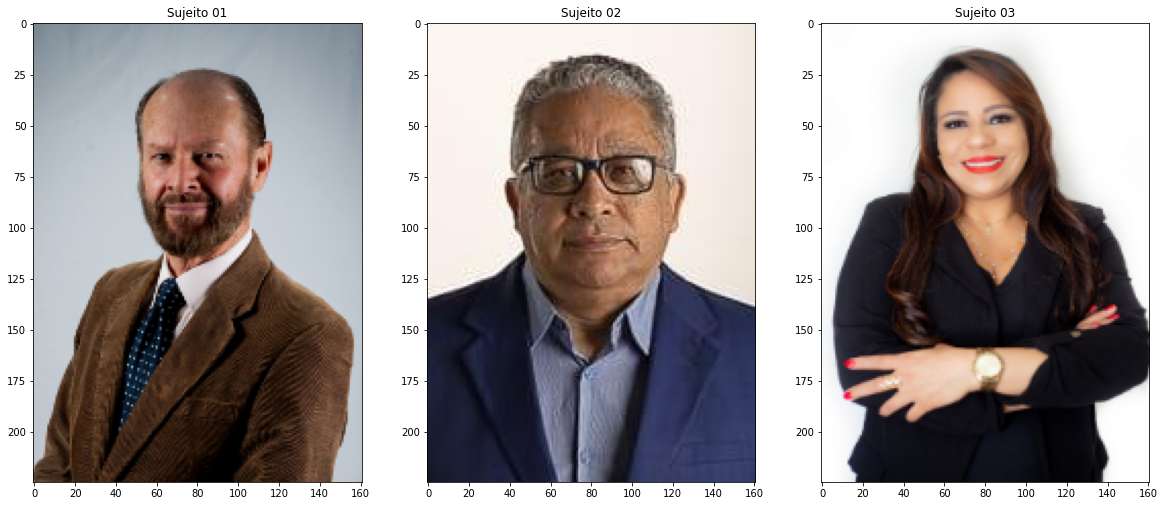

In [270]:
# Exemplos de imagens para exemplificação de regiões de interesse da face

imagem_face_1 = cv2.imread("./tcc_mba_usp_resultados_preliminares/imagens/raw_faces/s01_1.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("./tcc_mba_usp_resultados_preliminares/imagens/raw_faces/s02_1.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("./tcc_mba_usp_resultados_preliminares/imagens/raw_faces/s03_1.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)

plt.show()

In [271]:
# Listando caminho dos arquivos

faces_caminho = "./tcc_mba_usp_resultados_preliminares/imagens/raw_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [272]:
# Instanciando o classificador

classificador = cv2.CascadeClassifier("./tcc_mba_usp_resultados_preliminares/classificadores/haarcascade_frontalface_default.xml")

In [273]:
# Criando a pasta cropped_faces para as imagens apenas da região de interesse da face e acessando a pasta raw_faces, que contém as imagens sem tratamento de classificação 

cropped_faces_path = "./tcc_mba_usp_resultados_preliminares/imagens/cropped_faces/"
raw_faces_path = "./tcc_mba_usp_resultados_preliminares/imagens/raw_faces/"

if not path.exists(cropped_faces_path):
    makedirs(cropped_faces_path)

if not path.exists(raw_faces_path):
    makedirs(raw_faces_path)


In [274]:
# Utilizando o classificador para identificar em cada imagem a região de interesse da face

imagem_roi=0

for arq in lista_arq_faces:

  imagem_path = raw_faces_path + arq

  imagem_gray = cv2.imread(imagem_path, cv2.COLOR_RGB2GRAY)
  coord_face = classificador.detectMultiScale(imagem_gray, 1.3,1)

  for (x,y,w,h) in coord_face:
      imagem_roi = imagem_gray[y:y+h, x:x+w]
      imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)

  cv2.imwrite(arq, imagem_roi)

In [275]:
# Listando os arquivos de imagem com a região de interesse da face

cropped_faces_path_atual = "./"
lista_arq_cropped_faces = [f for f in listdir(cropped_faces_path_atual) if isfile(join(cropped_faces_path_atual, f))]

In [276]:
# Copiando os arquivos de imagem para a pasta cropped_faces

for arq in lista_arq_cropped_faces:
  shutil.copyfile(cropped_faces_path_atual + arq, cropped_faces_path + arq)

In [277]:
# Excluindo os arquivos que já foram copiados para a pasta cropped_faces para evitar duplicações

for arq in lista_arq_cropped_faces:
  remove(cropped_faces_path_atual + arq)

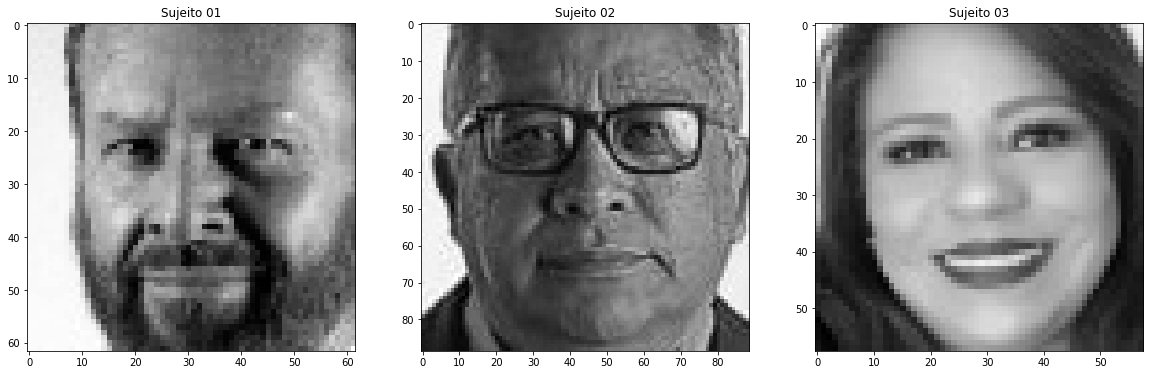

In [323]:
# Checando os exemplos anteriores com regiões de interesse da face já definida

imagem_face_1 = cv2.imread("./tcc_mba_usp_resultados_preliminares/imagens/cropped_faces/s01_1.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2GRAY)

imagem_face_2 = cv2.imread("./tcc_mba_usp_resultados_preliminares/imagens/cropped_faces/s02_1.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2GRAY)

imagem_face_3 = cv2.imread("./tcc_mba_usp_resultados_preliminares/imagens/cropped_faces/s03_1.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1, cmap='gray')
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2, cmap='gray')
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3, cmap='gray')

plt.show()

### Separando as imagens em treino e teste

Depois que os rostos são detectados, serão aplicados os algoritmos **Eigein Faces**, **Fisher Faces** e **LBPH** visando identificar as características específicas de cada rosto e compará-las com um banco de dados de rostos conhecidos para realizar a identificação.

Para tanto, a base de dados de imagens será separada em treino e teste, sendo que as imagens catalogadas com sxx_**1**.jpg serão destinadas a base de dados de treino e as catalogadas com sxx_**2**.jpg serão destinadas a base de dados de teste.

In [278]:
# Listando caminho dos arquivos

faces_caminho = "./tcc_mba_usp_resultados_preliminares/imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [279]:
# Criando as pastas de treino e teste e copiando os arquivos de imagem para as respectivas pastas de treino ou teste

faces_path_treino = "./tcc_mba_usp_resultados_preliminares/imagens/treino/"
faces_path_teste = "./tcc_mba_usp_resultados_preliminares/imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4]
    
    if int(numero) < 2:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [280]:
# Definindo função para padronização tamanho das imagens de treino e teste

def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [281]:
# Listando caminho dos arquivos nas pastas de treino e teste

lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [282]:
dados_treinamento, sujeitos = [], []

In [283]:
# Catalogando imagens e informações da imagem (a quem ela pertence)

for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [284]:
dados_teste, sujeitos_teste = [], [] 

In [285]:
# Catalogando imagens e informações da imagem (a quem ela pertence)

for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

Text(0.5, 1.0, '1')

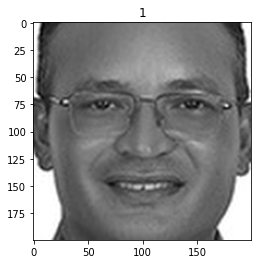

In [286]:
# Exemplo de dado de treinamnento. Na imagem o Sujeito 1 (especificado pelo título, que segundo a tabela de prefixos, diz respeito a RENAN BERLEZE RECCHIA)

plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

Text(0.5, 1.0, '21')

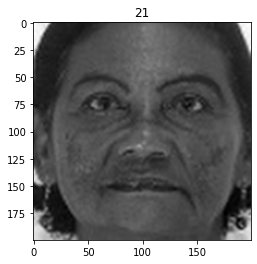

In [287]:
# Exemplo de dado de teste. Na imagem o Sujeito 21 (especificado pelo título, que segundo a tabela de prefixos, diz respeito a BENEDITA DUARTE DO AMARAL)

plt.imshow(dados_teste[1], cmap="gray")
plt.title(sujeitos_teste[1])

In [288]:
# Criação das variáveis referentes aos nomes dos sujeitos das imagens de treinamento e de teste

sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

### Aplicação do Algoritmo EingenFaces

O algoritmo Eigenfaces é baseado na teoria de análise de componentes principais, que procura encontrar direções principais de variação em um conjunto de dados.

No caso do reconhecimento facial, o PCA é aplicado à base de dados de imagens de rostos para encontrar as direções principais de variação na forma e na aparência dos rostos. Essas direções são representadas por autovetores, que são usados para projetar cada rosto em um subespaço de características, onde suas diferenças são maximizadas.

In [289]:
# Instanciando o modelo

modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [290]:
# Aplicando os dados de treinamento a instancia e criando um modelo

modelo_eingenfaces.train(dados_treinamento, sujeitos)

In [294]:
y_pred_eingenfaces = []

In [295]:
# Lista com as predições

for item in dados_teste:
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

### Aplicação do Algoritmo FisherFaces

O algoritmo FisherFaces é baseado na análise de componentes lineares discriminantes, que procura encontrar uma combinação linear de características que maximiza a separação entre diferentes categorias ou classes.

No caso do reconhecimento facial, a LDA é usada para maximizar a separação entre diferentes indivíduos em vez de apenas maximizar as diferenças entre cada rosto.

In [298]:
# Instanciando o modelo

modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [299]:
# Aplicando os dados de treinamento a instancia e criando um modelo

modelo_fisherfaces.train(dados_treinamento, sujeitos)

In [303]:
y_pred_fisherfaces = []

In [304]:
# Lista com as predições

for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

### Aplicação do Algoritmo LPBH

O algoritmo LBPH (Local Binary Patterns Histograms) é baseado na comparação de padrões locais de intensidade de pixels em uma imagem de rosto, o que é único para cada pessoa.

O algoritmo LBPH compara a intensidade relativa dos pixels em uma vizinhança em torno de um pixel central e codifica os resultados em padrões binários, que são usados ​​para criar um histograma que representa a face.

In [307]:
# Instanciando o modelo

modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [308]:
# Aplicando os dados de treinamento a instancia e criando um modelo

modelo_lbph.train(dados_treinamento, sujeitos)

In [312]:
y_pred_lbph = []

In [313]:
# Lista com as predições

for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

# <font color=darkblue>AVALIAÇÃO DOS MODELOS</font>
***

### Acurácia

Na área de reconhecimento facial, acurácia é a medida da proporção de identificações corretas em relação ao número total de identificações realizadas. Em outras palavras, a acurácia mede quantas vezes o sistema de reconhecimento facial identifica corretamente o rosto que está sendo avaliado. A fórmula da acurácia é:

**Acurácia = (Número de identificações corretas) / (Número total de identificações)**

In [325]:
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_pred_eingenfaces)
print(f'A acurácia do Modelo Eigein Faces é {round(acuracia_eingenfaces,2)*100}%')

A acurácia do Modelo Eigein Faces é 37.0%


In [327]:
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)
print(f'A acurácia do Modelo Fisher Faces é {round(acuracia_fisherfaces,2)*100}%')

A acurácia do Modelo Fisher Faces é 37.0%


In [331]:
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)
print(f'A acurácia do Modelo LBPH é {round(acuracia_lbph,2)*100}%')

A acurácia do Modelo LBPH é 37.0%


# <font color=darkblue>CONCLUSÃO</font>
***

Apesar das diferenças de abordagem, os modelos gerados pelos diferentes algoritmos obtiveram o mesmo valor de acurácia. Este valor também é aquém do esperado.

Sendo assim são possibilidades a serem trabalhadas na continuidade desse trabalho:

*   Aumento do banco de imagens viabilizando aprendizado e generalização dos modelos
*   Acréscimo de medidas de avaliação que considerem os diferentes grupos citados
*   Aumento de representação em relação à região, visando considerar representantes de todos os estados brasileiros, ou da maioria deles
*   Avaliação dos modelos com técnicas de vídeo, para efeitos de comparação com outros estudos da área



